## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for X and/or Y until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [125]:
#your work here##

### Set 1 data

In [2]:
# Import the libraries first

import numpy as np
import pandas as pd

# We will use matplotlib to plot figures
import matplotlib.pyplot as plt

# For regression analysis we will use the statsmodels package
import statsmodels.formula.api as sm

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

In [3]:
data = pd.read_excel('/Users/arushigupta/Desktop/Assignment4_data.xlsx', 'Set 1')

In [4]:
data

,y,x
0,38.858144,7.266278
1,40.891148,7.985333
2,48.971648,9.387120
3,46.410124,9.382849
4,25.333391,5.240903
...,...,...
95,21.347437,4.304918
96,15.811618,4.106201
97,39.739810,7.612336
98,7.963448,1.227335


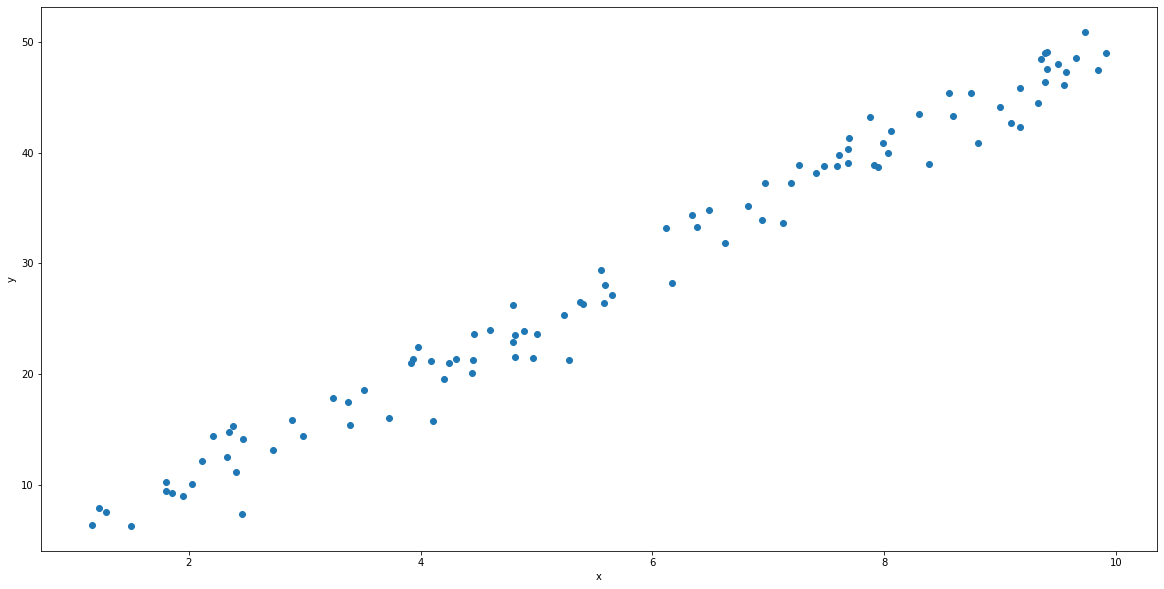

In [129]:
#plot the data

plt.plot(data.x, data.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [130]:
# Let's calculate the Pearson's correlation coefficient 

# This will calculate the correlation matrix
cm = data.corr(method = 'pearson')

# Print correlation matrix
cm

,y,x
y,1.000000,0.989468
x,0.989468,1.000000


In [131]:
# Calculate the means of x, y

mu_x = np.mean(data.x)
mu_y = np.mean(data.y)

print(mu_x, mu_y)

5.809318189398433 29.193214088275504


In [132]:
# Calculate the standard deviations of x, y

sig_x = np.std(data.x, ddof=1)
sig_y = np.std(data.y, ddof=1 )

print(sig_x, sig_y)

2.6177123843290535 13.186232166883334


In [133]:
beta_1 = sig_y/sig_x * cm.loc['x', 'y']
beta_0 = mu_y - beta_1 * mu_x

print(beta_0, beta_1)

0.23807024664960252 4.984258547666894


In [134]:
# Initialize the regression model

m = sm.ols('y ~ x', data = data)

In [135]:
# Fit the regression model

m = m.fit()

In [136]:
# Let's take a look at the regression parameters

m.params

Intercept    0.238070
x            4.984259
dtype: float64

In [137]:
# Calculate estimates of y

intercept, slope = m.params
data['y_est'] = intercept + slope * data.x

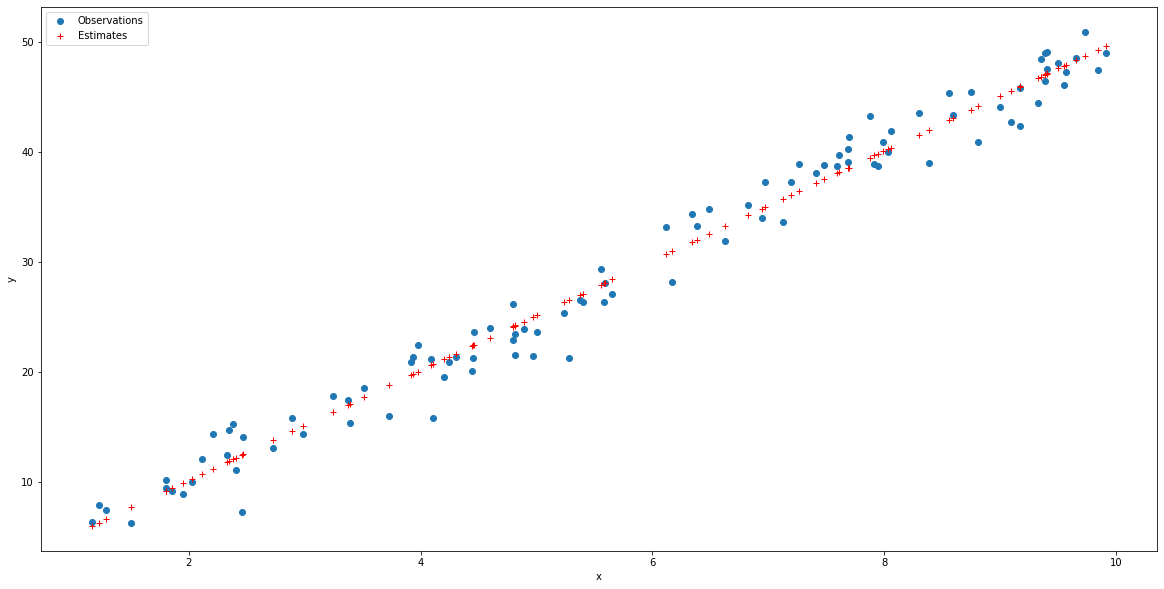

In [138]:
# Let's plot the estimates along the actual observations

plt.plot(data.x, data.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data.x, data.y_est, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

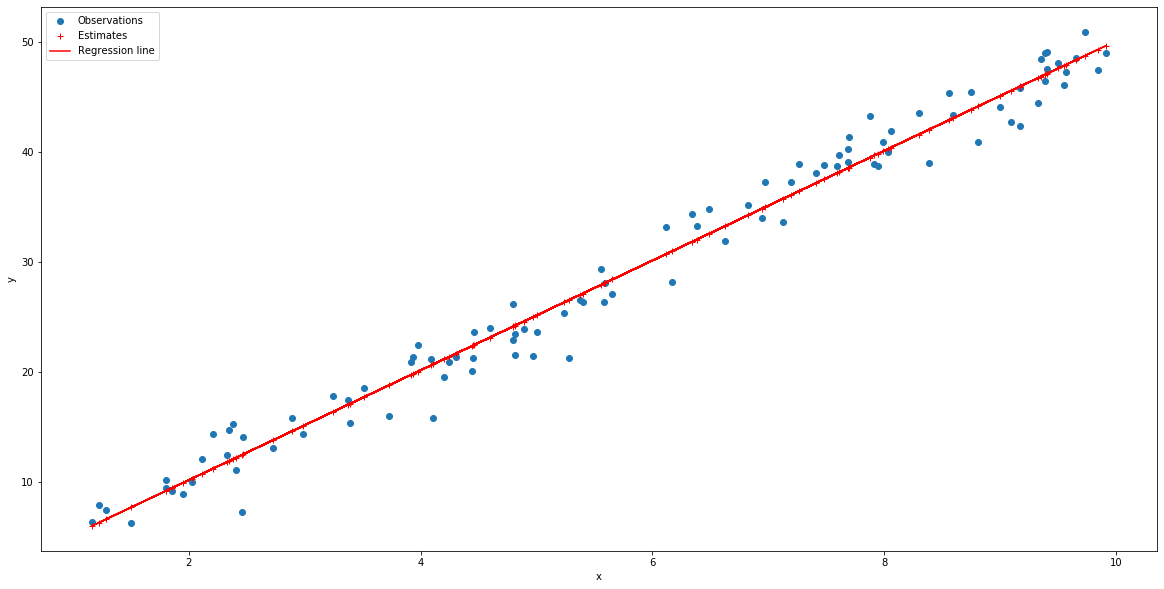

In [139]:
# all the estimates lie on the line;
# this is the regression line

plt.plot(data.x, data.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data.x, data.y_est, 'r+', label='Estimates')

# Plot regression line
plt.plot(data.x, data.y_est, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()

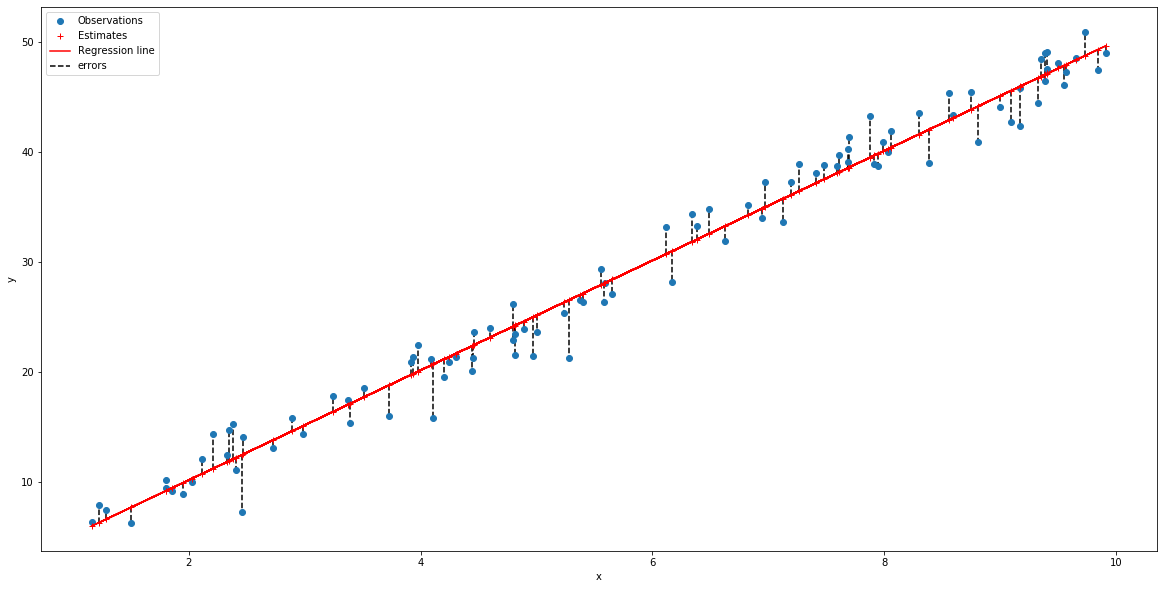

In [140]:
# We can even depict the errors associated with individual observations

plt.plot(data.x, data.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data.x, data.y_est, 'r+', label='Estimates')

# Plot regression line
plt.plot(data.x, data.y_est, 'r-', label='Regression line')

# Plot errors
plt.vlines(data.x, data.y_est, data.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

In [141]:
# Show the model summary

m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           4.47e-84
Time:                        22:23:58   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Set 2 data**



In [142]:
data2 = pd.read_excel('/Users/arushigupta/Desktop/Assignment4_data.xlsx',  'Set 2')

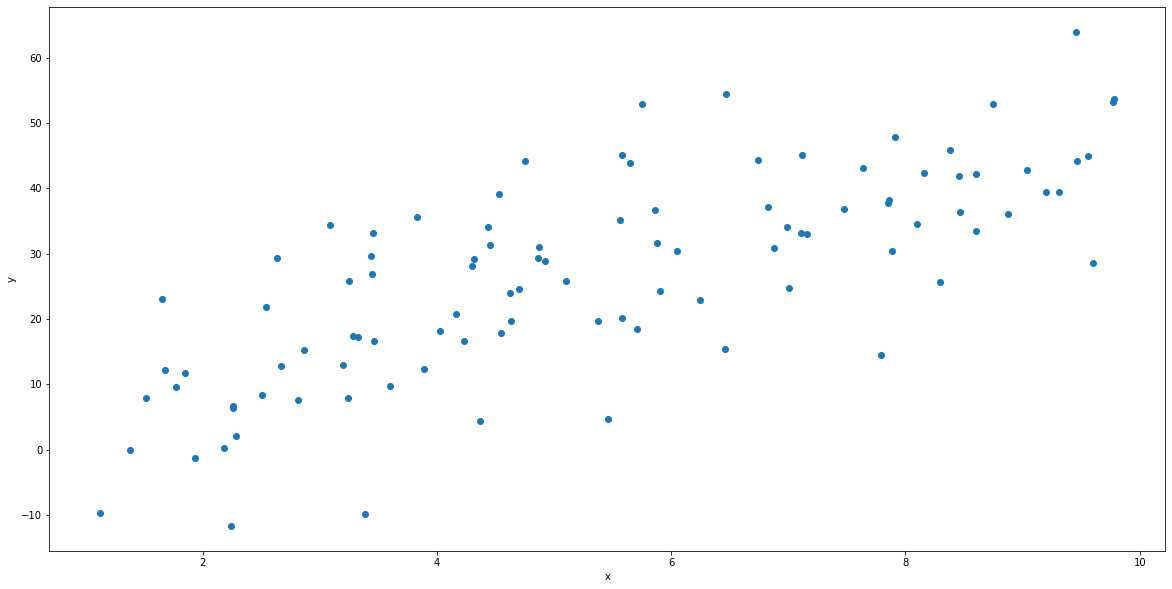

In [143]:
# And finally we will plot the data

plt.plot(data2.x, data2.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [144]:
# Let's calculate the Pearson's correlation coefficient first

# This will calculate the correlation matrix
cm = data2.corr(method = 'pearson')

# Print correlation matrix
cm

,y,x
y,1.000000,0.745168
x,0.745168,1.000000


In [145]:
# Calculate the means of x, y

mean_y = np.mean(data2.y)
mean_x = np.mean(data2.x)

print(mean_y, mean_x)

26.774707353588543 5.375184037349295


In [146]:
# Calculate the standard deviations of x, y

sig_x1 = np.std(data2.x, ddof=1)
sig_y1 = np.std(data2.y, ddof=1 )

print(sig_x1, sig_y1)

2.4364560000707685 15.620389615388762


In [147]:
beta_1 = sig_y1/sig_x1 * cm.loc['x', 'y']
beta_0 = mean_y - beta_1 * mean_x

print(beta_0, beta_1)

1.0955520655451245 4.777353688657472


In [148]:
# Initialize the regression model

model = sm.ols('y ~ x', data = data2)

In [149]:
# Fit the regression model

model = model.fit()

In [150]:
model.params

Intercept    1.095552
x            4.777354
dtype: float64

In [151]:
# Calculate estimates of y

intercept, slope = model.params
data2['y_estimates'] = intercept + slope * data2.x

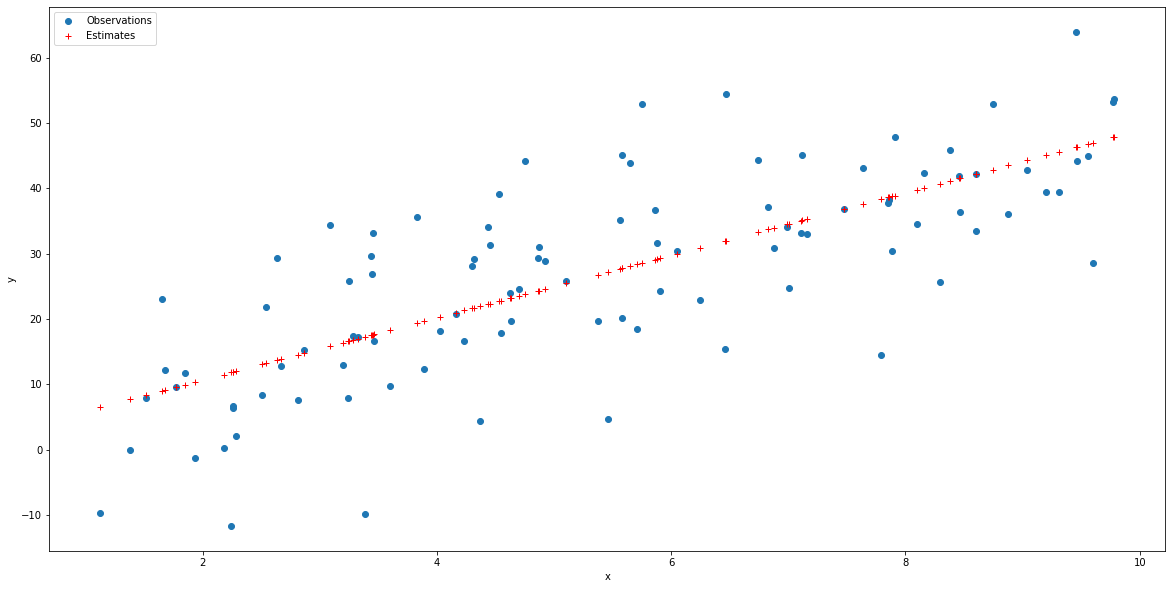

In [152]:
# Let's plot the estimates along the actual observations

plt.plot(data2.x, data2.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data2.x, data2.y_estimates, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

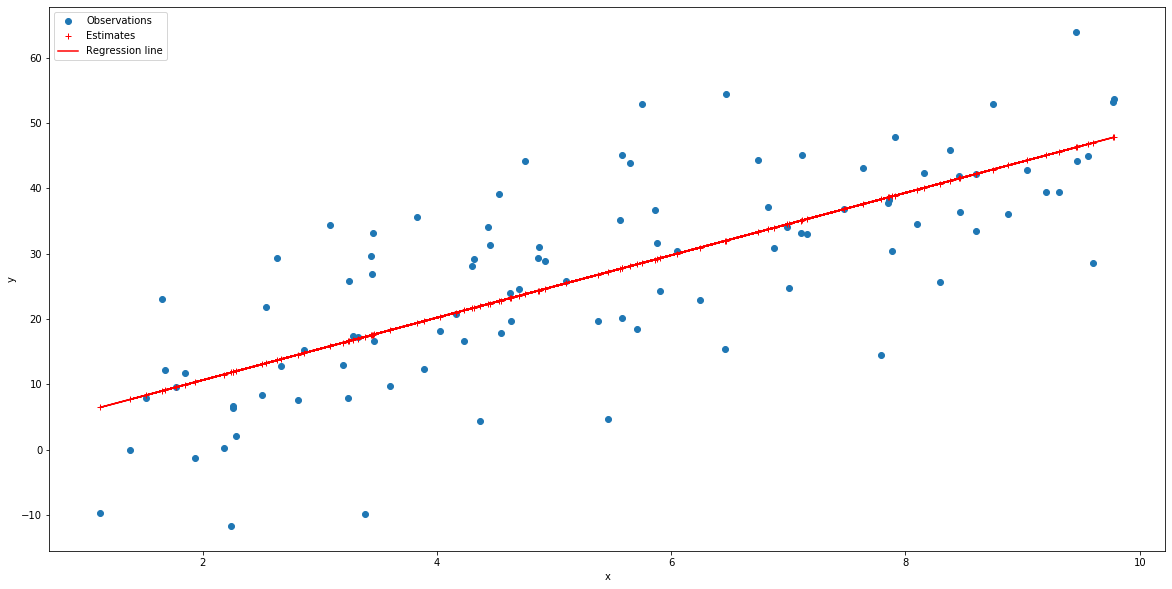

In [153]:
# all the estimates lie on the line;
# this is the regression line

plt.plot(data2.x, data2.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data2.x, data2.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data2.x, data2.y_estimates, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()

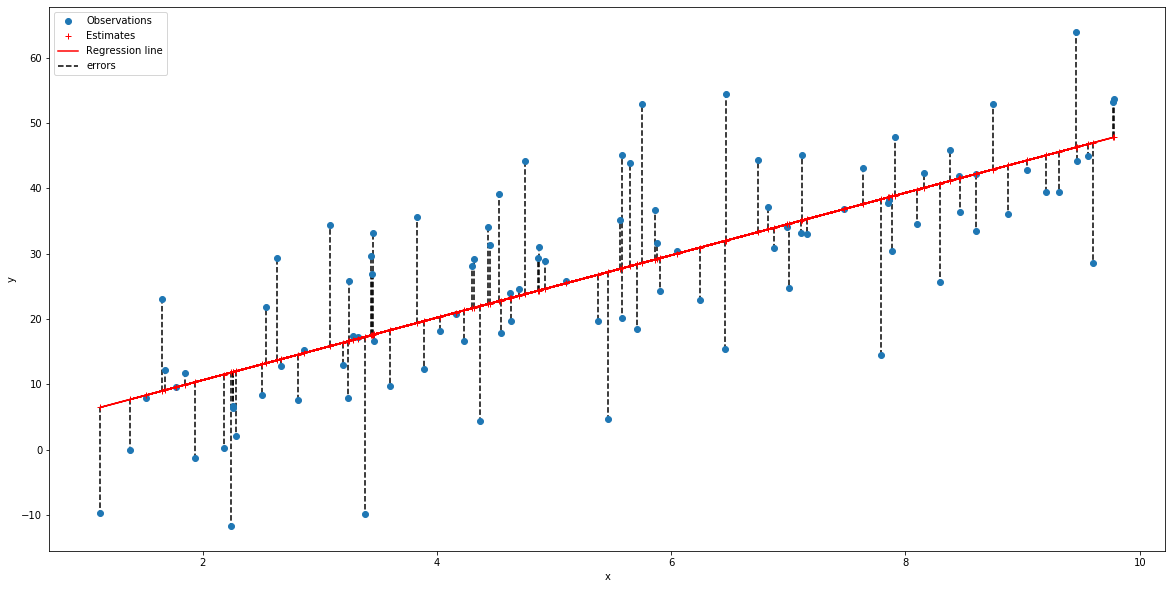

In [154]:
# We can even depict the errors associated with individual observations

plt.plot(data2.x, data2.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data2.x, data2.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data2.x, data2.y_estimates, 'r-', label='Regression line')

# Plot errors
plt.vlines(data2.x, data2.y_estimates, data2.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

In [155]:
# Show the model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           6.11e-19
Time:                        22:24:00   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

count    1.000000e+02
mean     5.364598e-15
std      1.041688e+01
min     -2.427189e+01
25%     -6.825796e+00
50%      3.255999e-01
75%      6.370633e+00
max      2.713100e+01
Name: Residuals, dtype: float64

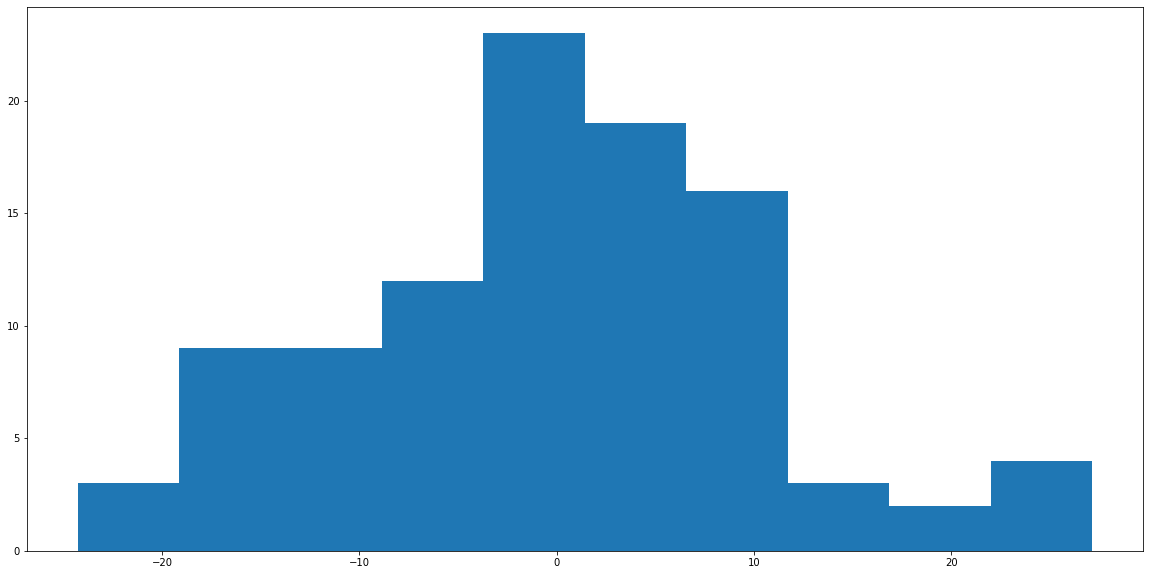

In [156]:
# Calculate the residuals
data2['Residuals'] = data2['y_estimates'] - data2['y']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(data2.Residuals)

# And we will print the statistical summary of the residuals,
# i.e. (median, mean, quartiles, etc.)
data2['Residuals'].describe()

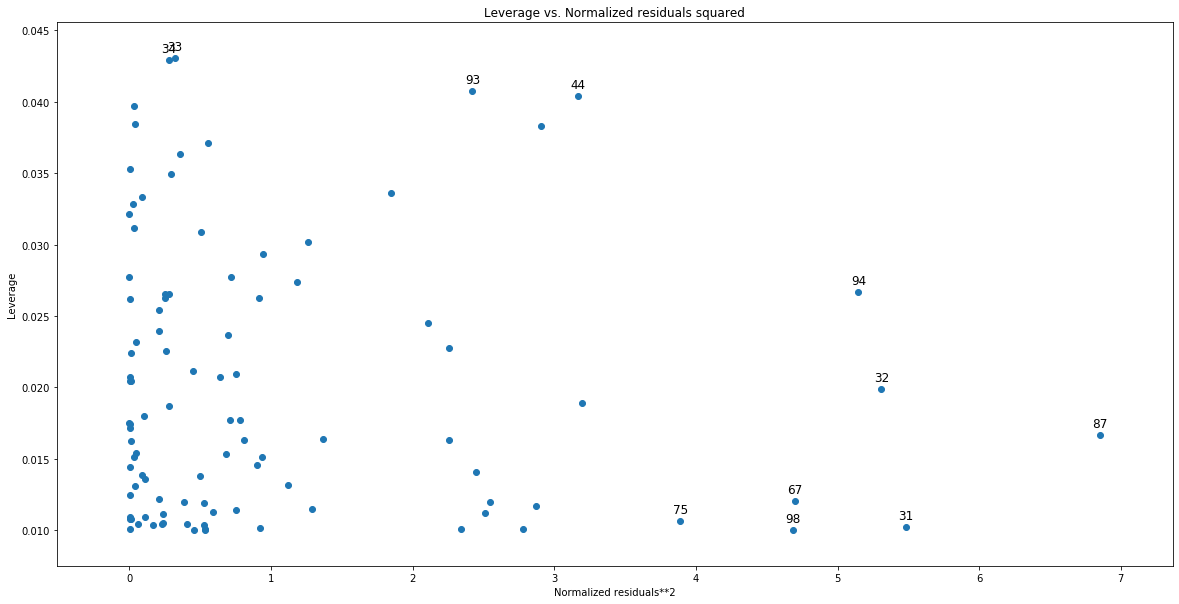

In [157]:
fig = plot_leverage_resid2(model, ax=ax)

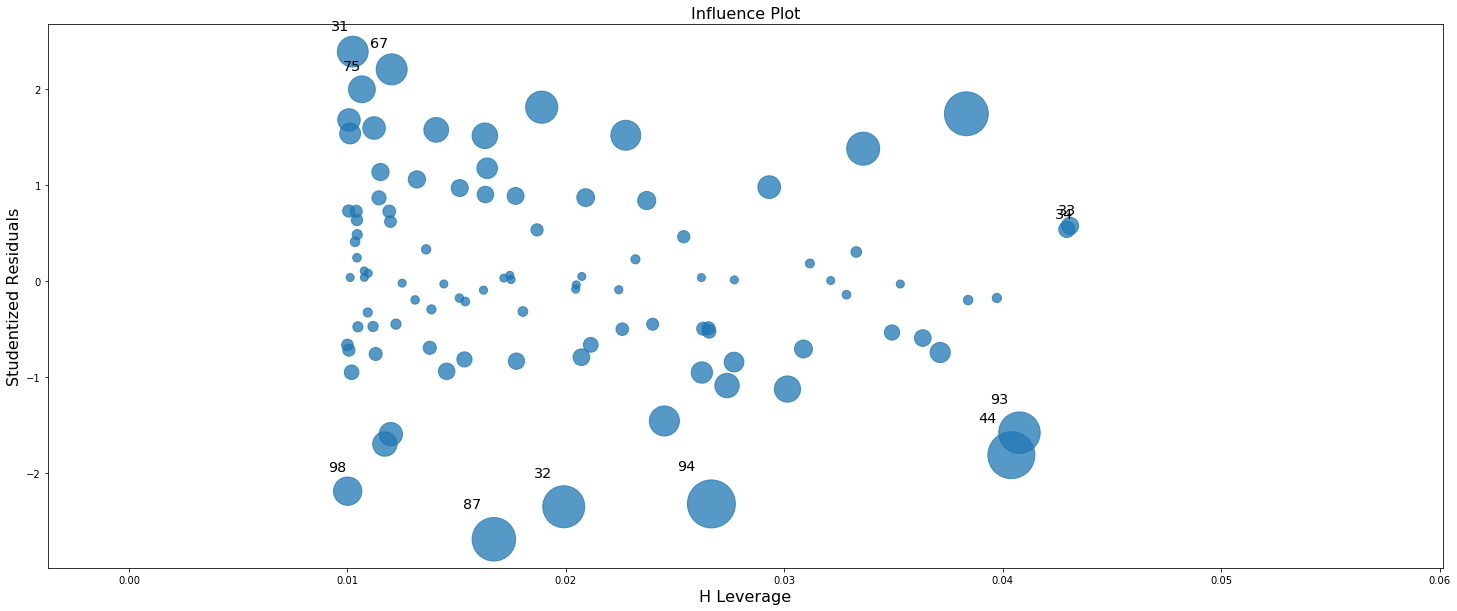

In [158]:
fig, ax = plt.subplots(figsize=(25,10))
fig = influence_plot(model, ax=ax)

In [159]:
# calculate the R-squared

# Let's calculate the correlation between the 
# estimate and true values
cm = data2[['y', 'y_estimates']].corr()

# Square the obtained values
R2 = cm.loc['y', 'y_estimates']**2

# Print the R-squared
print ('R2 = %f' % R2)

R2 = 0.555275


### Set 3 data 

In [160]:
data3 = pd.read_excel('/Users/arushigupta/Desktop/Assignment4_data.xlsx',  'Set 3')

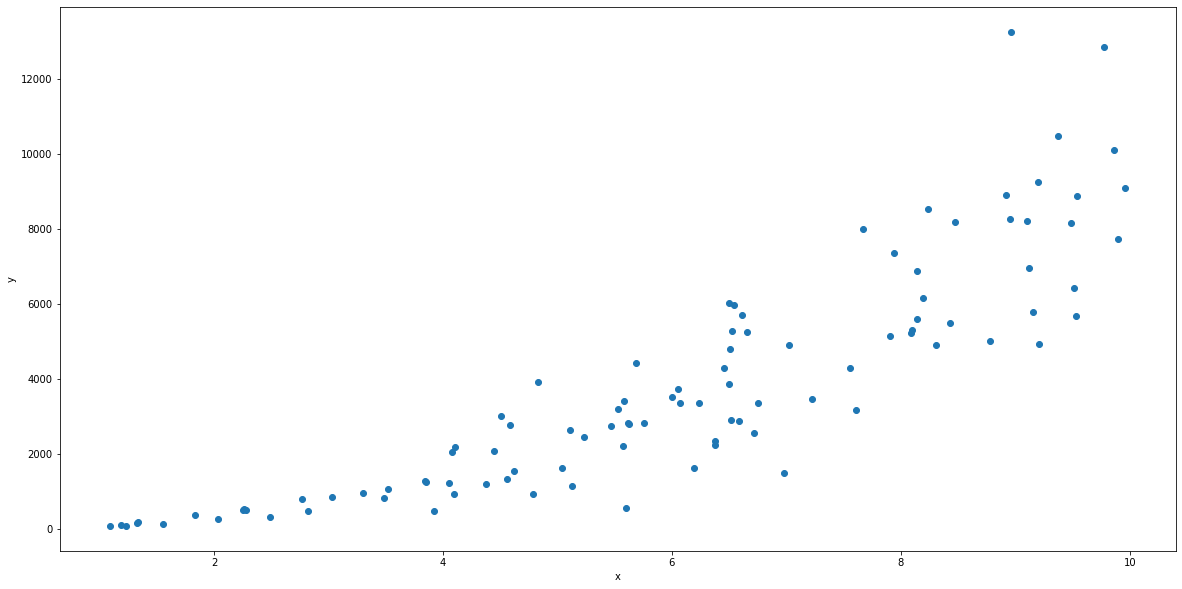

In [161]:
# And finally we will plot the data

plt.plot(data3.x, data3.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [162]:
# Let's calculate the Pearson's correlation coefficient first

# This will calculate the correlation matrix
cm = data3.corr(method = 'pearson')

# Print correlation matrix
cm

,y,x
y,1.000000,0.869031
x,0.869031,1.000000


In [163]:
# Calculate the means of x, y

mean_y = np.mean(data3.y)
mean_x = np.mean(data3.x)

print(mean_y, mean_x)

3853.8435187740993 5.999130000000001


In [164]:
# Calculate the standard deviations of x, y

sig_x1 = np.std(data3.x, ddof=1)
sig_y1 = np.std(data3.y, ddof=1 )

print(sig_x1, sig_y1)

2.44405810762231 3042.5227162011843


In [165]:
beta_1 = sig_y1/sig_x1 * cm.loc['x', 'y']
beta_0 = mean_y - beta_1 * mean_x

print(beta_0, beta_1)

-2636.1748393061184 1081.8265912024272


In [166]:
# Initialize the regression model

model3 = sm.ols('y ~ x', data = data3).fit()

In [167]:
model3.params

Intercept   -2636.174839
x            1081.826591
dtype: float64

In [168]:
# Calculate estimates of y

intercept, slope = model3.params
data3['y_estimates'] = intercept + slope * data3.x

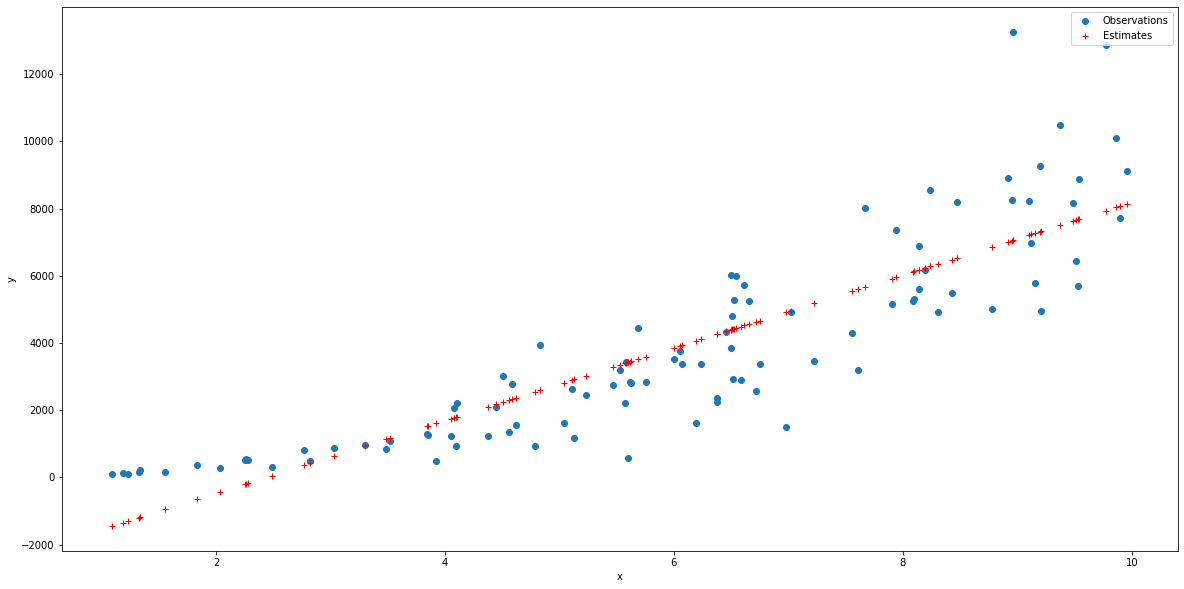

In [169]:
# Let's plot the estimates along the actual observations

plt.plot(data3.x, data3.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data3.x, data3.y_estimates, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

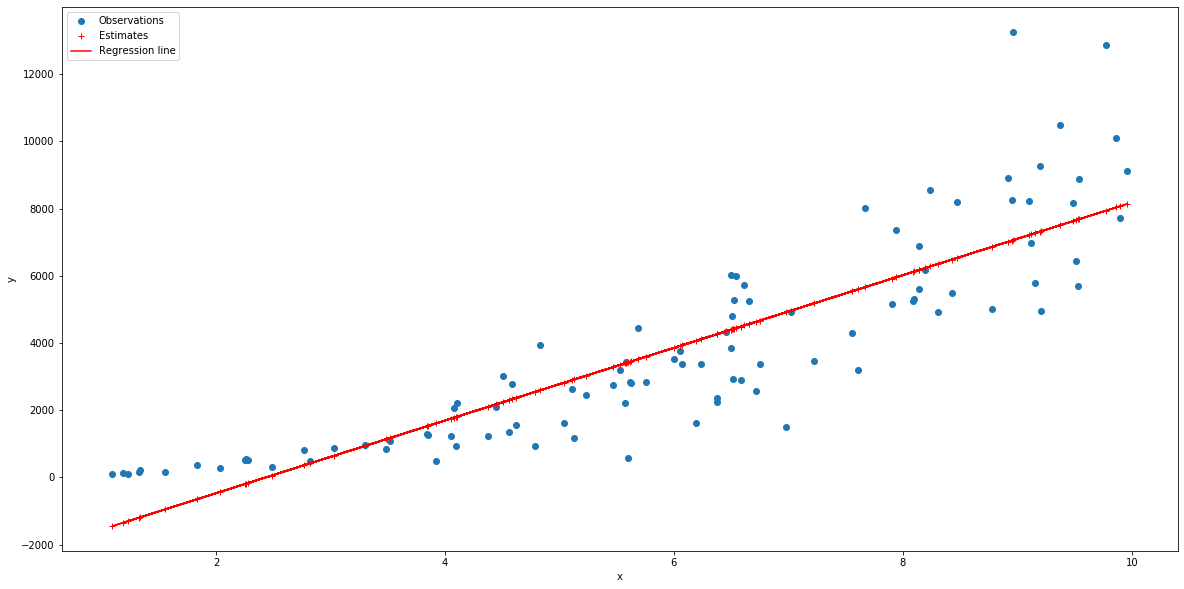

In [170]:
# all the estimates lie on the line;
# this is the regression line

plt.plot(data3.x, data3.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data3.x, data3.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data3.x, data3.y_estimates, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()

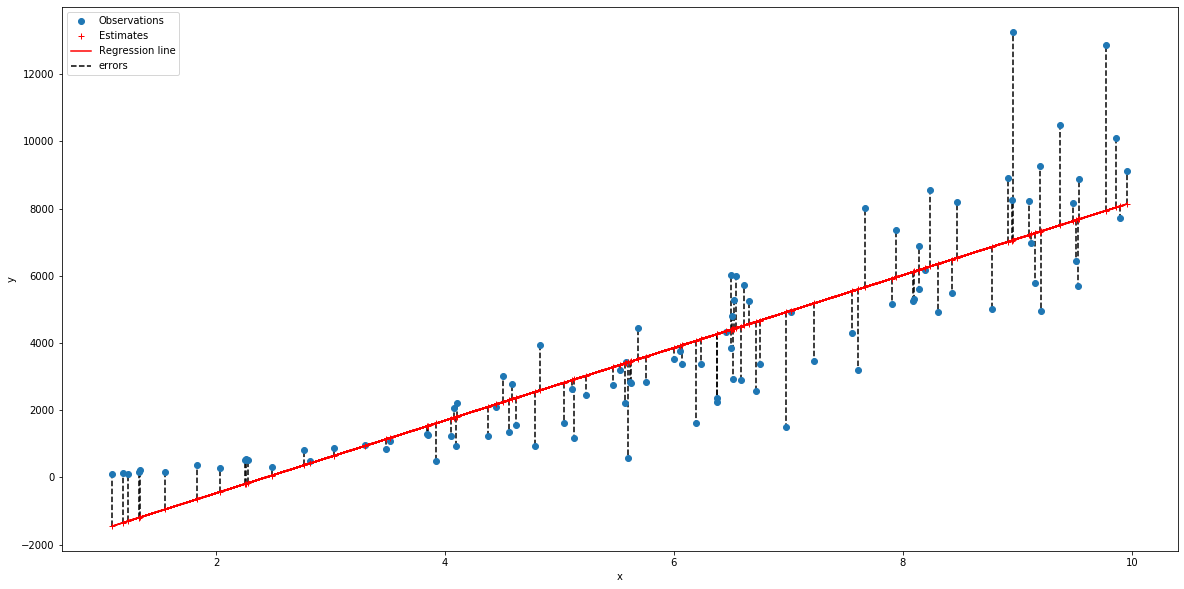

In [171]:
# We can even depict the errors associated with individual observations

plt.plot(data3.x, data3.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data3.x, data3.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data3.x, data3.y_estimates, 'r-', label='Regression line')

# Plot errors
plt.vlines(data3.x, data3.y_estimates, data3.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

In [172]:
# Show the model summary

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.04e-31
Time:                        22:24:03   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

count    1.000000e+02
mean     1.903118e-12
std      1.505310e+03
min     -6.202119e+03
25%     -9.320867e+02
50%      1.251402e+02
75%      8.943890e+02
max      3.406664e+03
Name: Residuals, dtype: float64

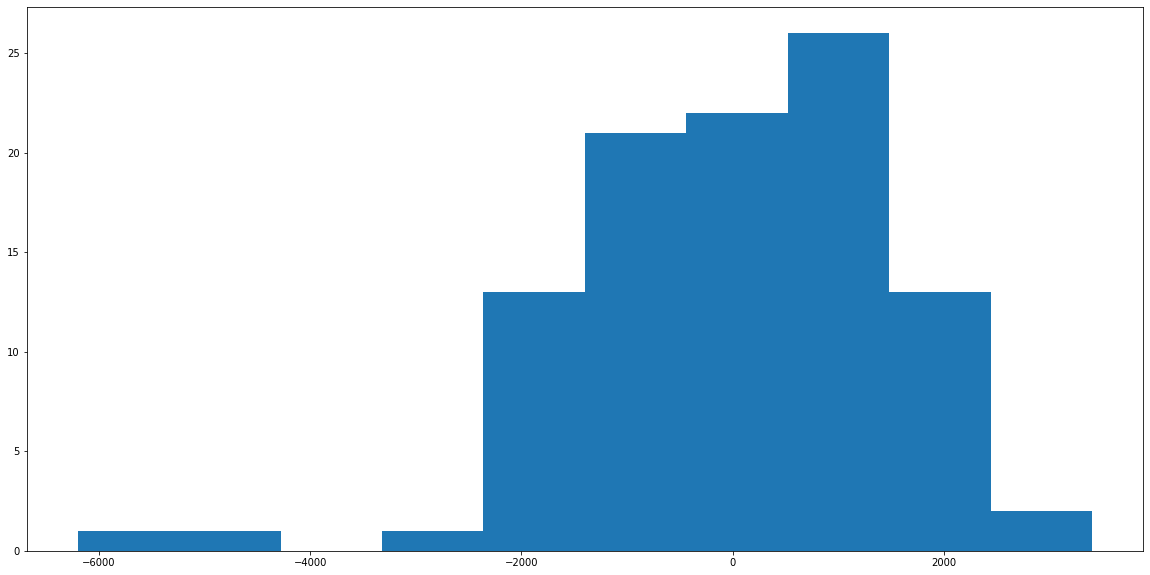

In [173]:
# Calculate the residuals
data3['Residuals'] = data3['y_estimates'] - data3['y']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(data3.Residuals)

# And we will print the statistical summary of the residuals,
# i.e. (median, mean, quartiles, etc.)
data3['Residuals'].describe()

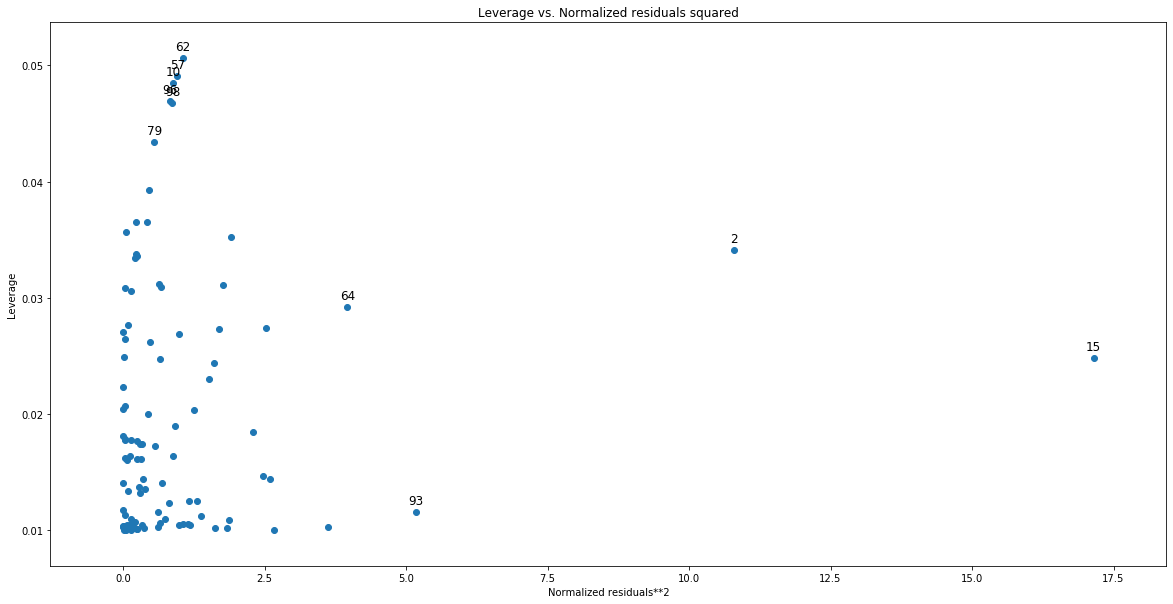

In [275]:
fig = plot_leverage_resid2(model3, ax=ax)

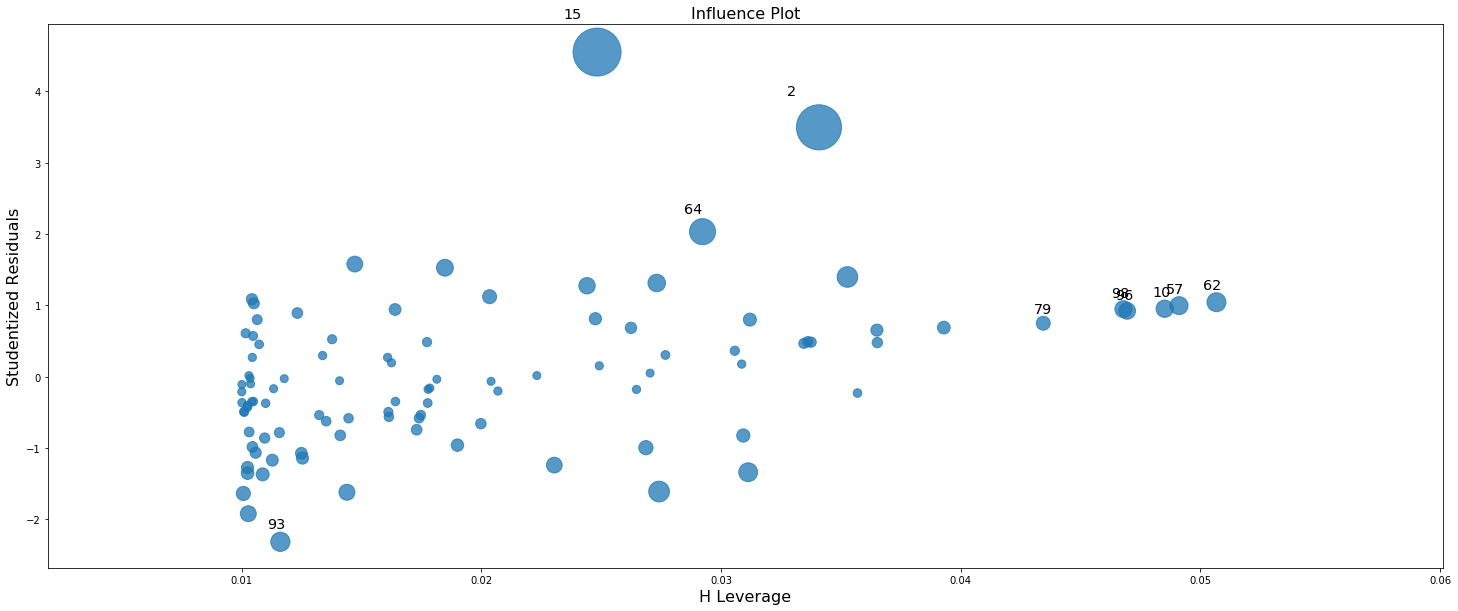

In [276]:
fig, ax = plt.subplots(figsize=(25,10))
fig = influence_plot(model3, ax=ax)

In [176]:
# calculate the R-squared

# Let's calculate the correlation between the 
# estimate and true values
cm = data3[['y', 'y_estimates']].corr()

# Square the obtained values
R2 = cm.loc['y', 'y_estimates']**2

# Print the R-squared
print ('R2 = %f' % R2)

R2 = 0.755215


In [177]:
import numpy as np

data3['y_log'] = np.log(data3['y'])
y_mod= data3['y_log']
x_mod= data3['x']


In [178]:
result_mod = sm.ols('y_mod~x_mod', data=data3).fit()

In [179]:
result_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_mod   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     519.7
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           5.82e-41
Time:                        22:24:04   Log-Likelihood:                -64.530
No. Observations:                 100   AIC:                             133.1
Df Residuals:                      98   BIC:                             138.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1716      0.124     41.690      0.000       4.925       5.418
x_mod          0.4368      0.019     22.796      0.000       0.399       0.475
==============================================================================
Omnibus:                        3.457   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.160
Skew:                          -0.435   Prob(JB):                        0.206
Kurtosis:                       3.014   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
result_mod.params

Intercept    5.171611
x_mod        0.436849
dtype: float64

In [181]:
# Calculate estimates of y

intercept, slope = result_mod.params
data3['y_est'] = intercept + slope * data3.x

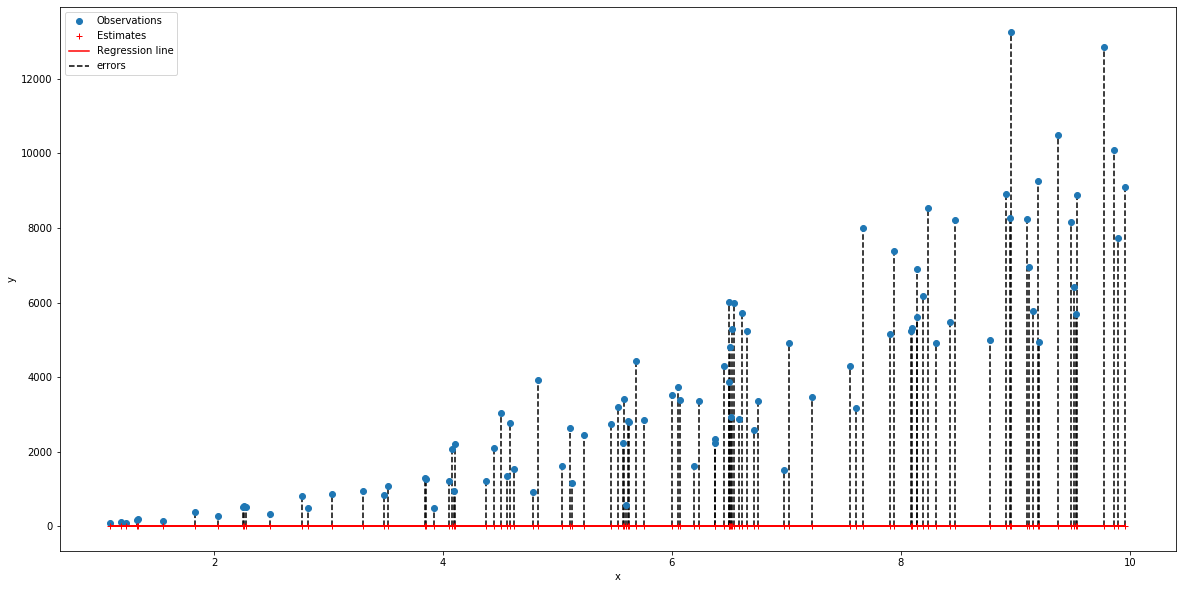

In [182]:
# We can even depict the errors associated with individual observations

plt.plot(data3.x, data3.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data3.x, data3.y_est, 'r+', label='Estimates')

# Plot regression line
plt.plot(data3.x, data3.y_est, 'r-', label='Regression line')

# Plot errors
plt.vlines(data3.x, data3.y_est, data3.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

In [183]:
result_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_mod   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     519.7
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           5.82e-41
Time:                        22:24:05   Log-Likelihood:                -64.530
No. Observations:                 100   AIC:                             133.1
Df Residuals:                      98   BIC:                             138.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1716      0.124     41.690      0.000       4.925       5.418
x_mod          0.4368      0.019     22.796      0.000       0.399       0.475
==============================================================================
Omnibus:                        3.457   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.160
Skew:                          -0.435   Prob(JB):                        0.206
Kurtosis:                       3.014   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Set 4 data**

In [184]:
data4 = pd.read_excel('/Users/arushigupta/Desktop/Assignment4_data.xlsx',  'Set 4')

In [185]:
data4

,y,x
0,1.887192e+05,5.9947
1,7.107264e+03,3.9492
2,3.729064e+06,9.6353
3,5.691779e+02,0.4943
4,3.022130e+06,9.0811
...,...,...
95,1.132489e+06,8.4176
96,1.015551e+06,8.5450
97,2.653507e+04,5.4277
98,8.602001e+05,7.6067


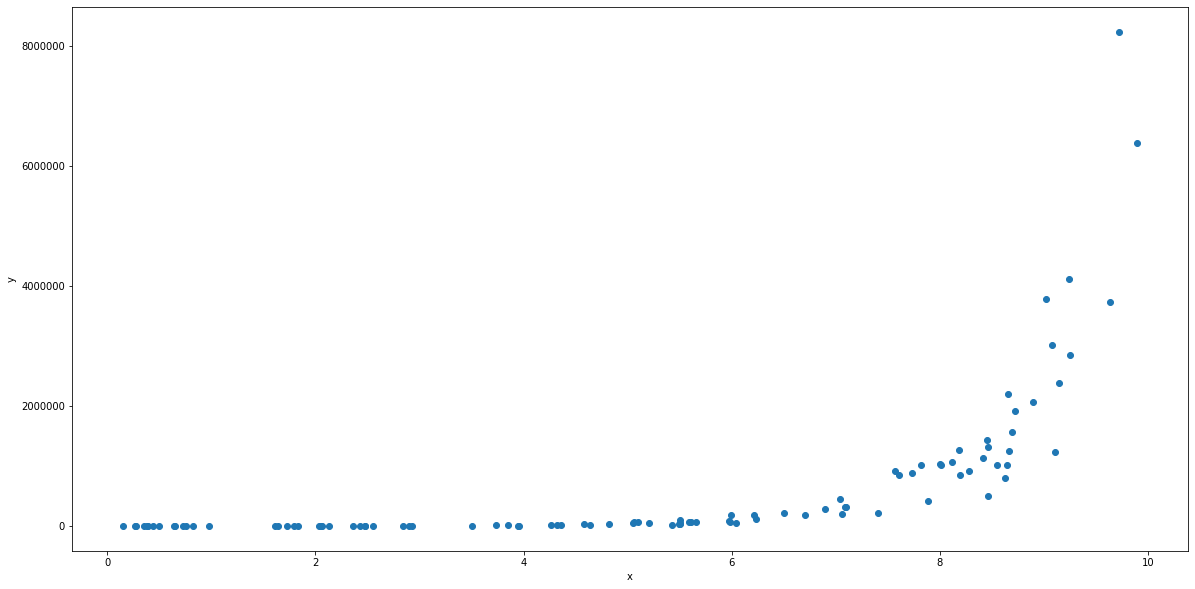

In [186]:
# And finally we will plot the data

plt.plot(data4.x, data4.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [187]:
# Let's calculate the Pearson's correlation coefficient first

# This will calculate the correlation matrix
cm = data4.corr(method = 'pearson')

# Print correlation matrix
cm

,y,x
y,1.000000,0.616155
x,0.616155,1.000000


In [188]:
# Calculate the means of x, y

mean_y = np.mean(data4.y)
mean_x = np.mean(data4.x)

print(mean_y, mean_x)

661442.8636142033 5.227871000000001


In [189]:
# Calculate the standard deviations of x, y

sig_x1 = np.std(data4.x, ddof=1)
sig_y1 = np.std(data4.y, ddof=1 )

print(sig_x1, sig_y1)

2.9860725563821755 1311668.294702755


In [190]:
beta_1 = sig_y1/sig_x1 * cm.loc['x', 'y']
beta_0 = mean_y - beta_1 * mean_x

print(beta_0, beta_1)

-753498.6681300638 270653.4900620667


In [191]:
# Initialize the regression model

model4 = sm.ols('y ~ x', data = data4).fit()

In [192]:
model4.params

Intercept   -753498.668130
x            270653.490062
dtype: float64

In [193]:
# Calculate estimates of y

intercept, slope = model4.params
data4['y_estimates'] = intercept + slope * data4.x

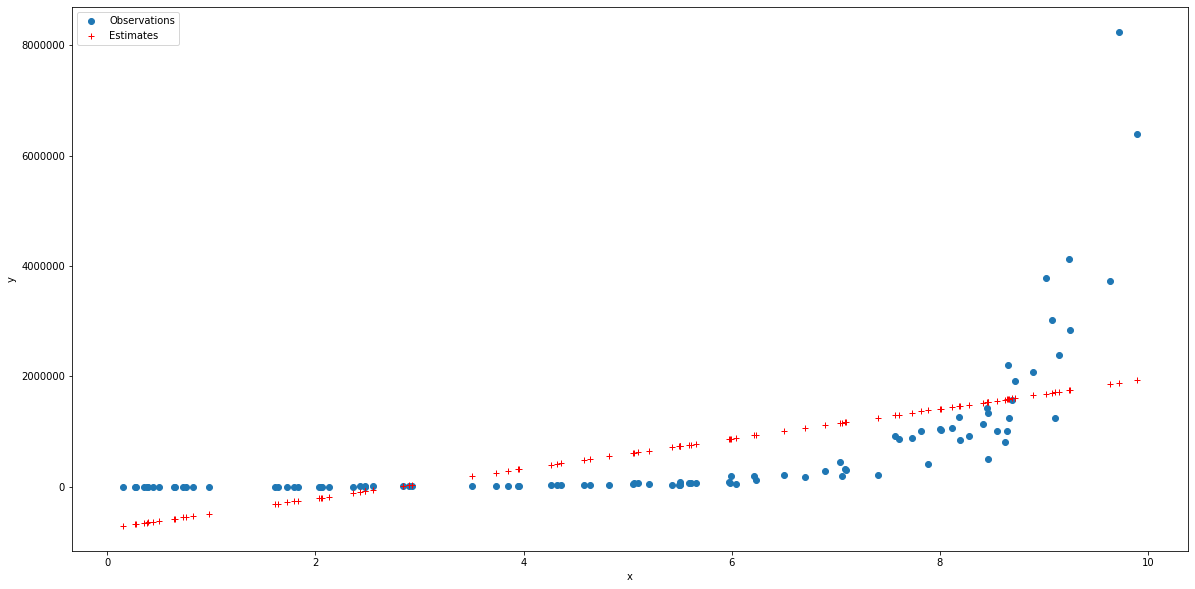

In [194]:
# Let's plot the estimates along the actual observations

plt.plot(data4.x, data4.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data4.x, data4.y_estimates, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

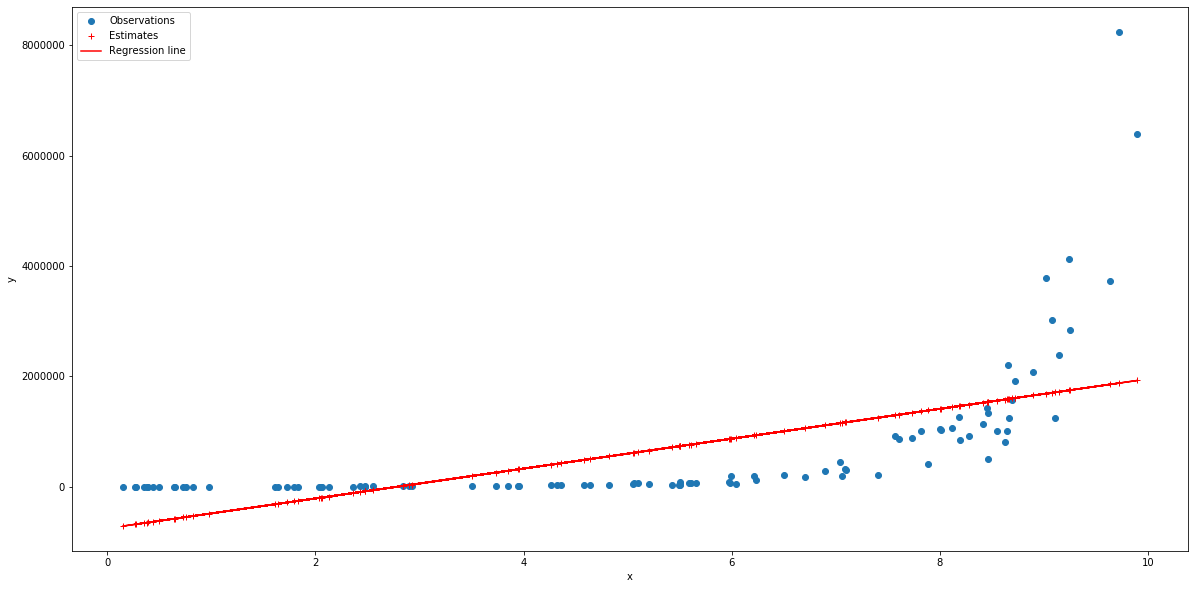

In [195]:
# all the estimates lie on the line;
# this is the regression line

plt.plot(data4.x, data4.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data4.x, data4.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data4.x, data4.y_estimates, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()

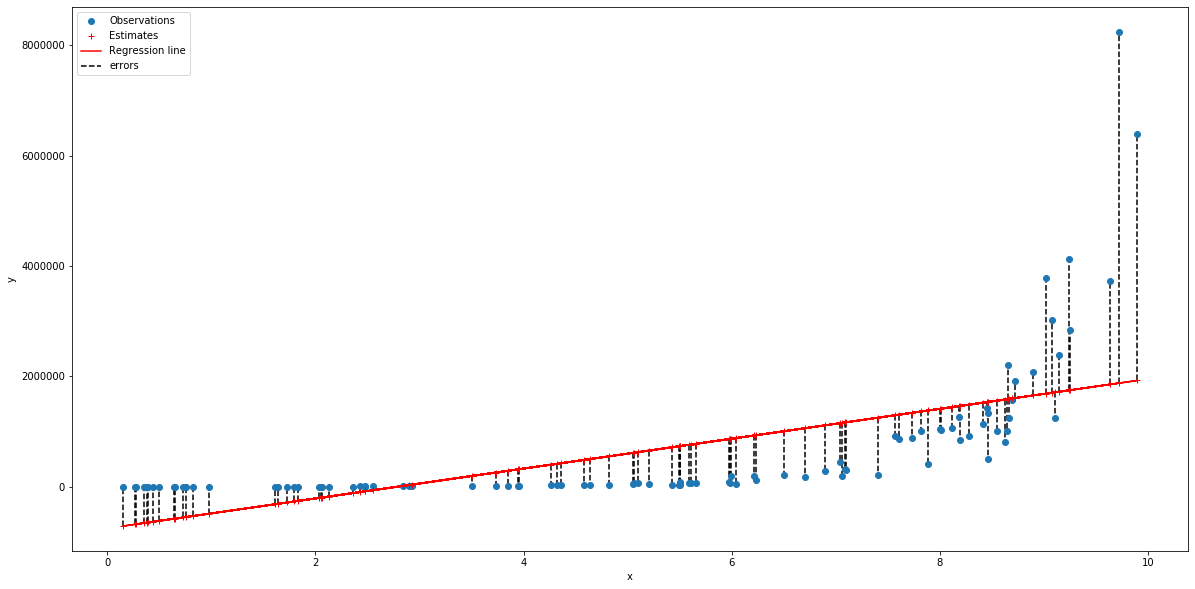

In [196]:
# We can even depict the errors associated with individual observations

plt.plot(data4.x, data4.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data4.x, data4.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data4.x, data4.y_estimates, 'r-', label='Regression line')

# Plot errors
plt.vlines(data4.x, data4.y_estimates, data4.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

In [202]:
# Show the model summary

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           8.87e-12
Time:                        22:28:25   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
x           2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

count    1.000000e+02
mean    -5.634502e-10
std      1.033103e+06
min     -6.364011e+06
25%     -3.134527e+05
50%      3.081833e+05
75%      6.187548e+05
max      1.039076e+06
Name: Residuals, dtype: float64

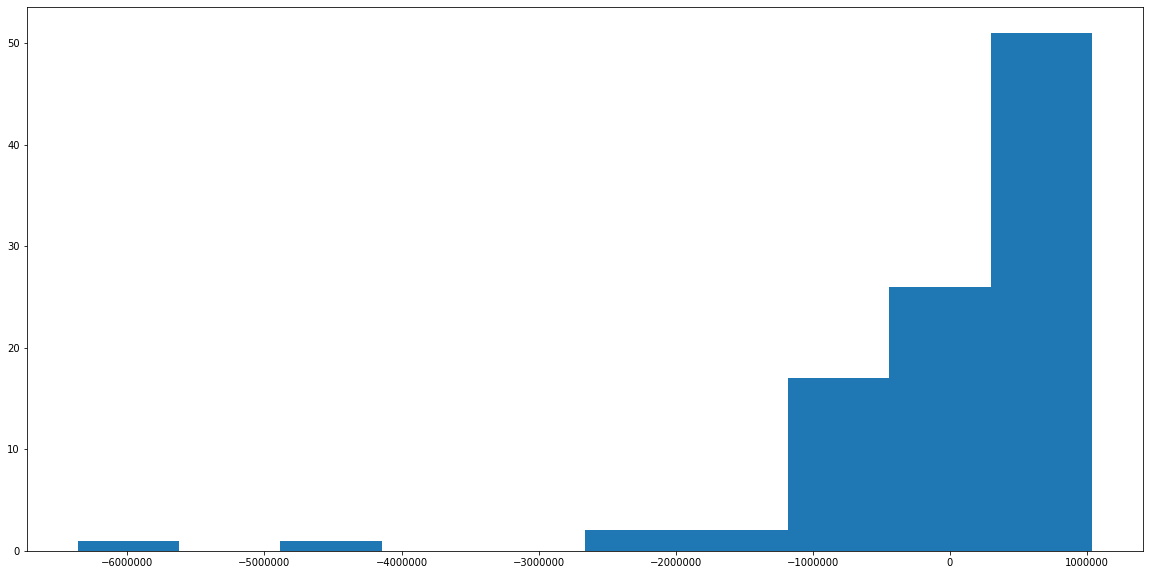

In [198]:
# Calculate the residuals
data4['Residuals'] = data4['y_estimates'] - data4['y']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(data4.Residuals)

# And we will print the statistical summary of the residuals,
# i.e. (median, mean, quartiles, etc.)
data4['Residuals'].describe()

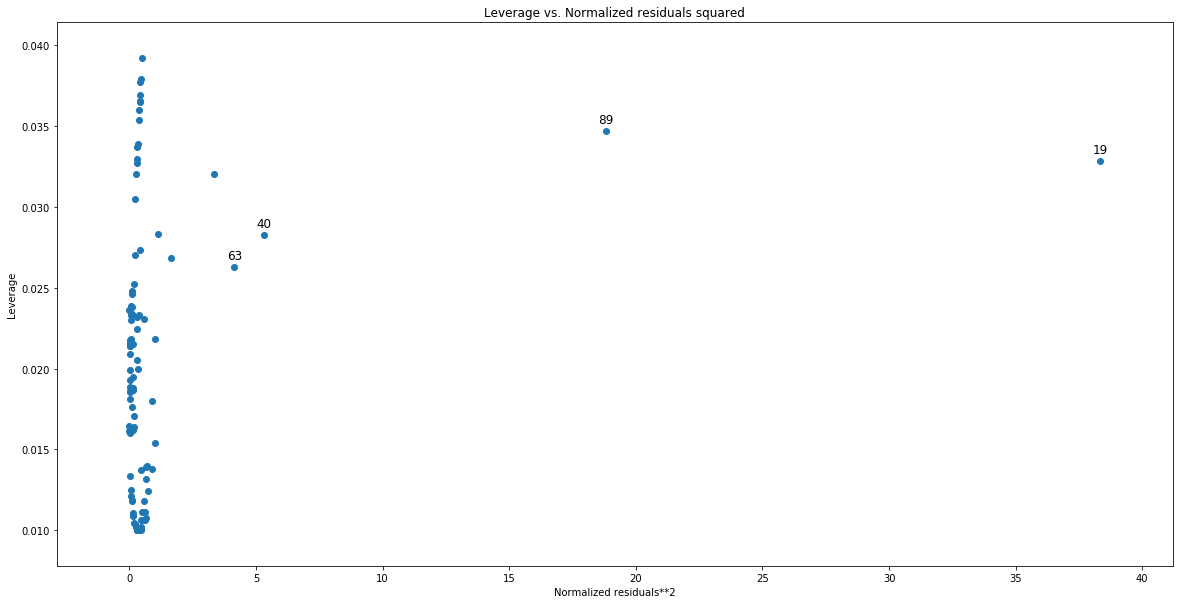

In [277]:
fig = plot_leverage_resid2(model4, ax=ax)

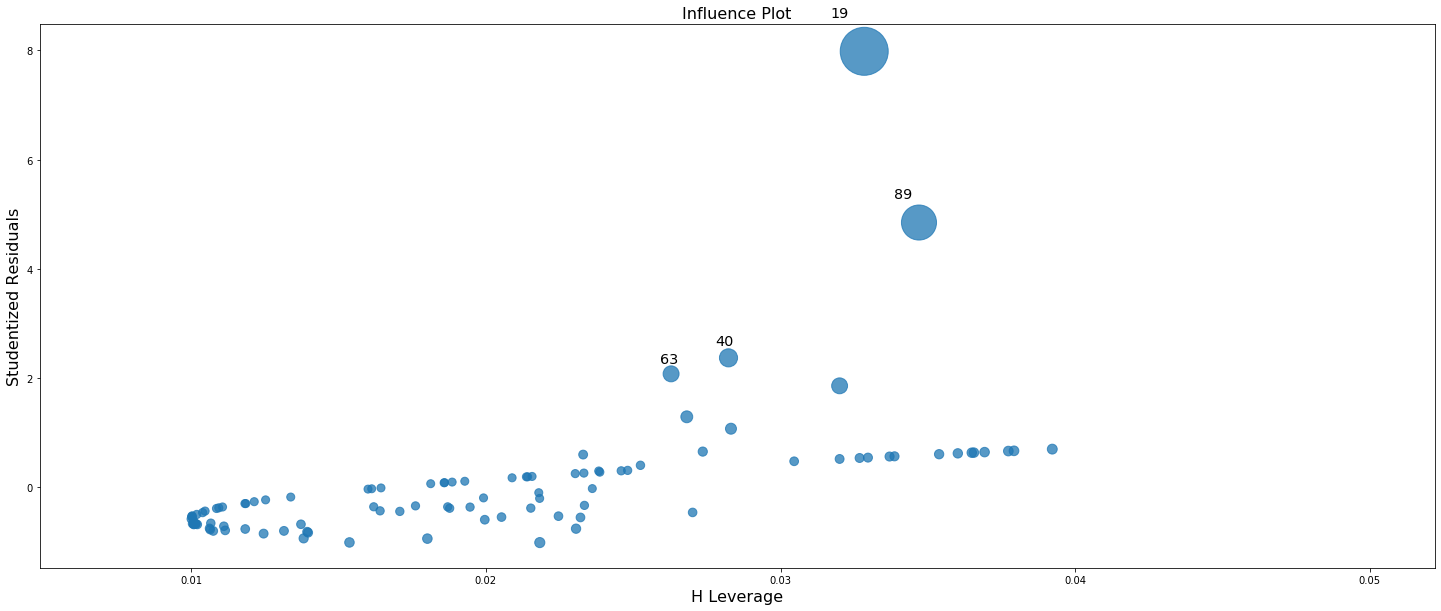

In [278]:
fig, ax = plt.subplots(figsize=(25,10))
fig = influence_plot(model4, ax=ax)

In [203]:
# calculate the R-squared

# Let's calculate the correlation between the 
# estimate and true values
cm = data4[['y', 'y_estimates']].corr()

# Square the obtained values
R2 = cm.loc['y', 'y_estimates']**2

# Print the R-squared
print ('R2 = %f' % R2)

R2 = 0.379647


In [217]:
import numpy as np

data4['y_log'] = np.log(data4['y'])
y_mod= data4['y_log']
x_mod= data4['x']

In [218]:
result_mod1 = sm.ols('y_mod~x_mod', data=data4).fit()
result_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_mod   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           6.91e-89
Time:                        22:32:33   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x_mod          0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
result_mod1.params

Intercept    5.664722
x_mod        0.989848
dtype: float64

In [221]:
# Calculate estimates of y

intercept, slope = result_mod1.params
data4['y_est'] = intercept + slope * data4.x

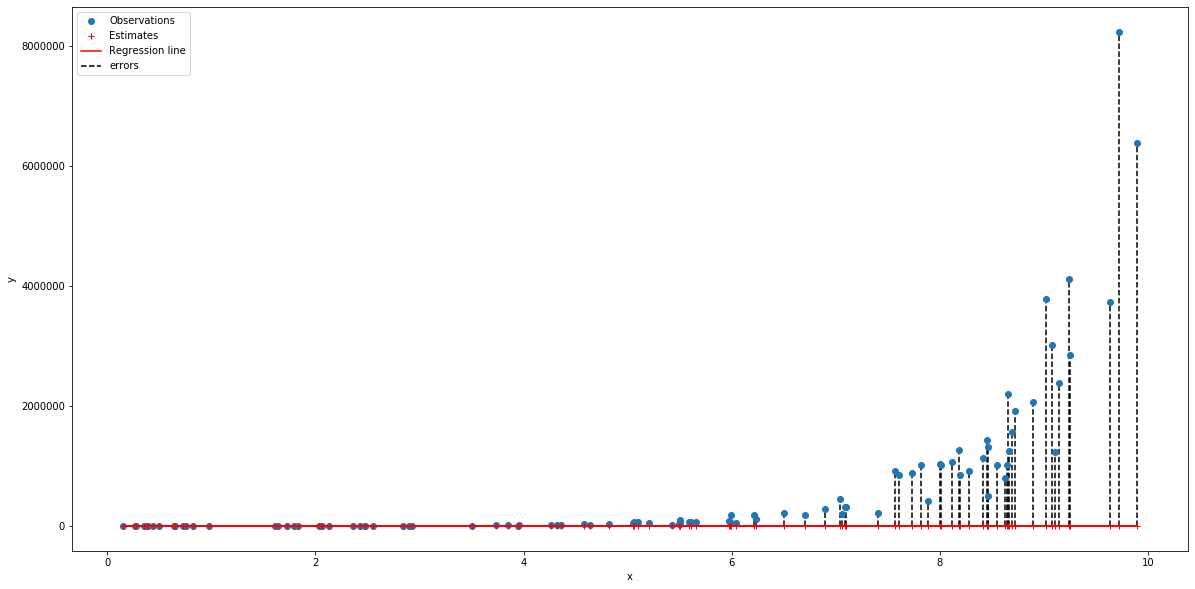

In [222]:
# We can even depict the errors associated with individual observations

plt.plot(data4.x, data4.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data4.x, data4.y_est, 'r+', label='Estimates')

# Plot regression line
plt.plot(data4.x, data4.y_est, 'r-', label='Regression line')

# Plot errors
plt.vlines(data4.x, data4.y_est, data4.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

In [223]:
result_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_mod   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           6.91e-89
Time:                        22:35:13   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x_mod          0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Set 5 data** 

In [224]:
data5 = pd.read_excel('/Users/arushigupta/Desktop/Assignment4_data.xlsx',  'Set 5')

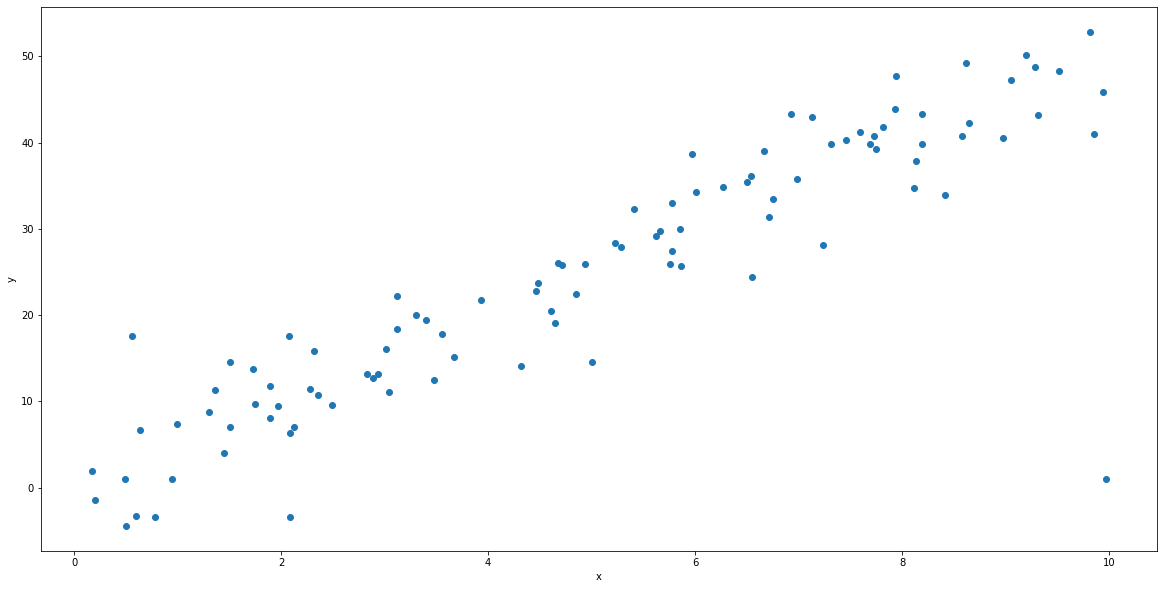

In [226]:
# And finally we will plot the data

plt.plot(data5.x, data5.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [227]:
# Let's calculate the Pearson's correlation coefficient first

# This will calculate the correlation matrix
cm = data5.corr(method = 'pearson')

# Print correlation matrix
cm

,y,x
y,1.000000,0.897892
x,0.897892,1.000000


In [228]:
# Calculate the means of x, y

mean_y = np.mean(data5.y)
mean_x = np.mean(data5.x)

print(mean_y, mean_x)

24.640736209557026 4.975682277227723


In [229]:
# Calculate the standard deviations of x, y

sig_x1 = np.std(data5.x, ddof=1)
sig_y1 = np.std(data5.y, ddof=1 )

print(sig_x1, sig_y1)

2.852301356708958 15.143420359947635


In [230]:
beta_1 = sig_y1/sig_x1 * cm.loc['x', 'y']
beta_0 = mean_y - beta_1 * mean_x

print(beta_0, beta_1)

0.9212565388609946 4.76708084421976


In [231]:
# Initialize the regression model

model5 = sm.ols('y ~ x', data = data5).fit()

In [232]:
model5.params

Intercept    0.921257
x            4.767081
dtype: float64

In [233]:
# Calculate estimates of y

intercept, slope = model5.params
data5['y_estimates'] = intercept + slope * data5.x

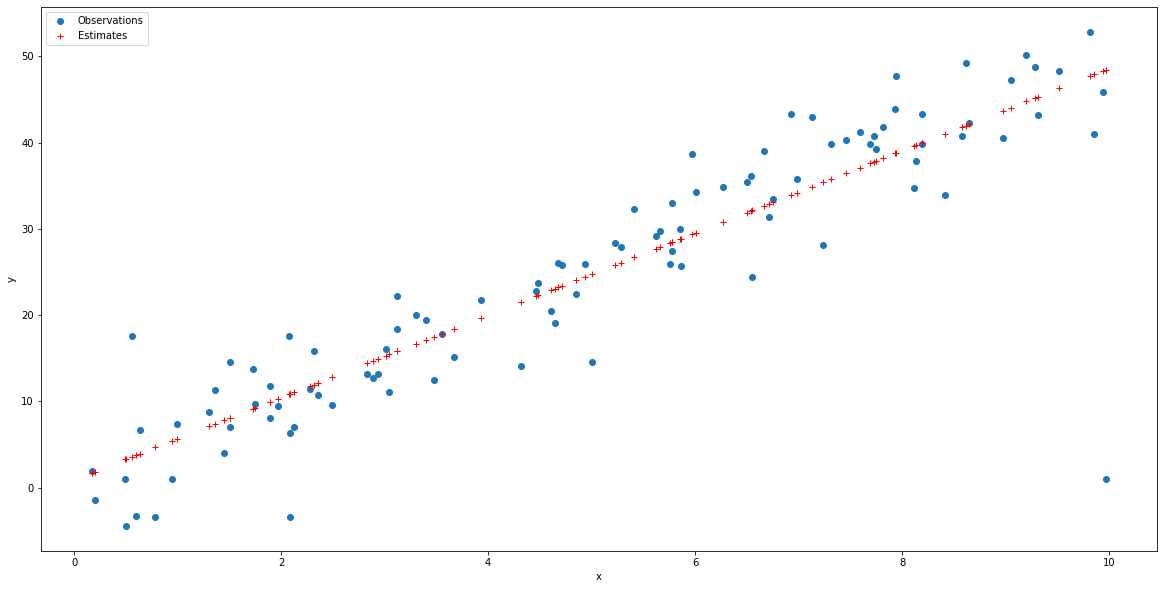

In [234]:
# Let's plot the estimates along the actual observations

plt.plot(data5.x, data5.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data5.x, data5.y_estimates, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

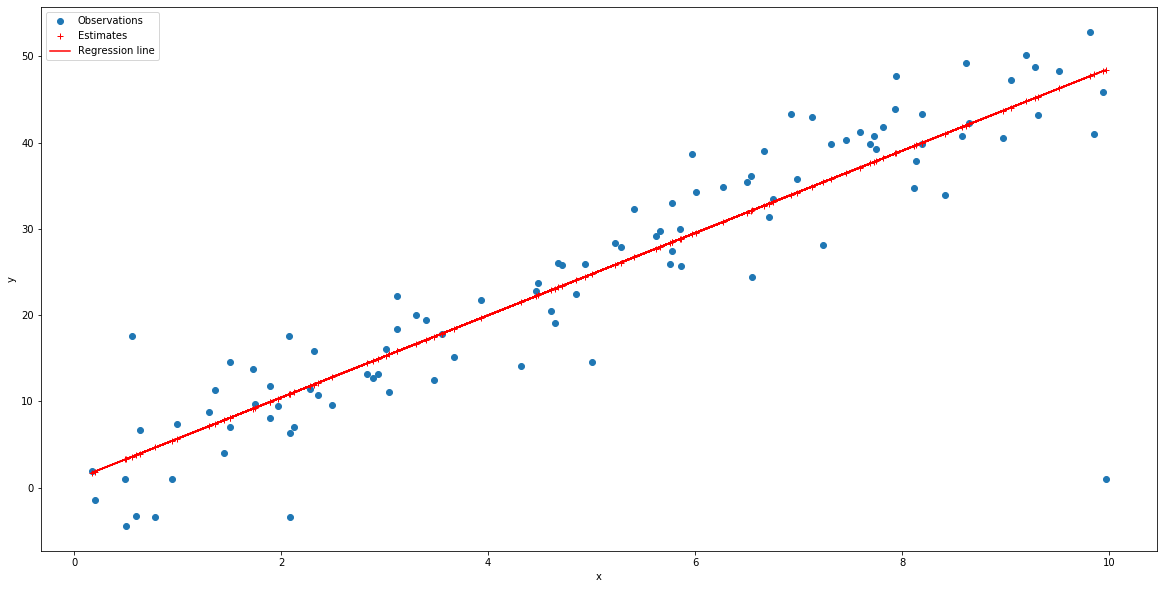

In [235]:
# all the estimates lie on the line;
# this is the regression line

plt.plot(data5.x, data5.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data5.x, data5.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data5.x, data5.y_estimates, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()

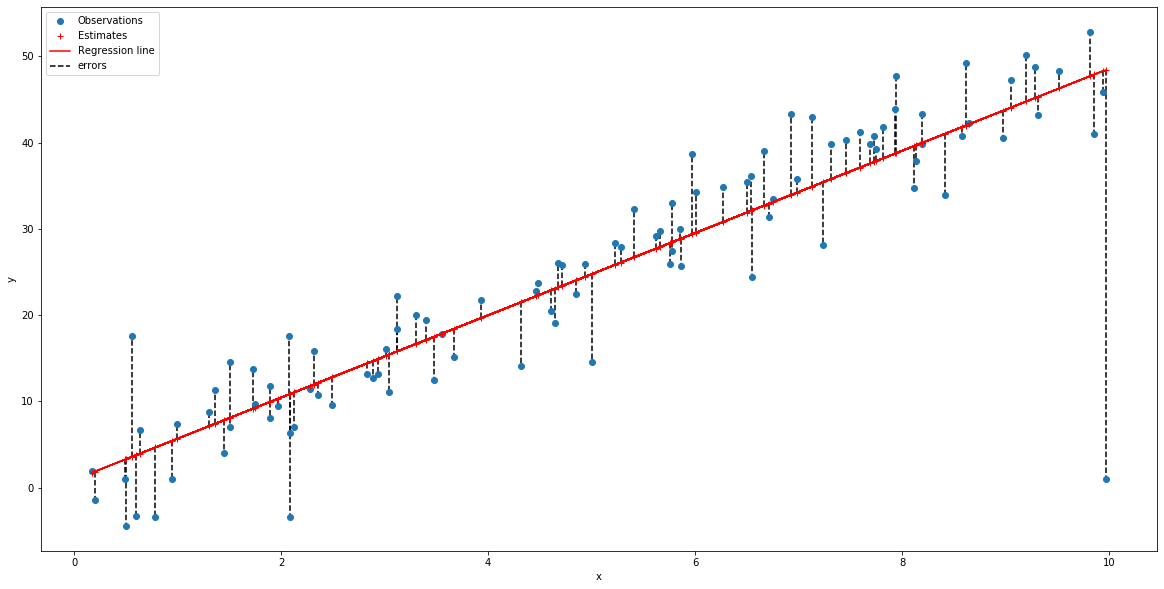

In [236]:
# We can even depict the errors associated with individual observations

plt.plot(data5.x, data5.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data5.x, data5.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data5.x, data5.y_estimates, 'r-', label='Regression line')

# Plot errors
plt.vlines(data5.x, data5.y_estimates, data5.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

In [237]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           4.70e-37
Time:                        22:51:44   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
x              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

count    1.010000e+02
mean    -1.055261e-15
std      6.666383e+00
min     -1.403782e+01
25%     -3.542946e+00
50%     -1.164350e+00
75%      2.449717e+00
max      4.742030e+01
Name: Residuals, dtype: float64

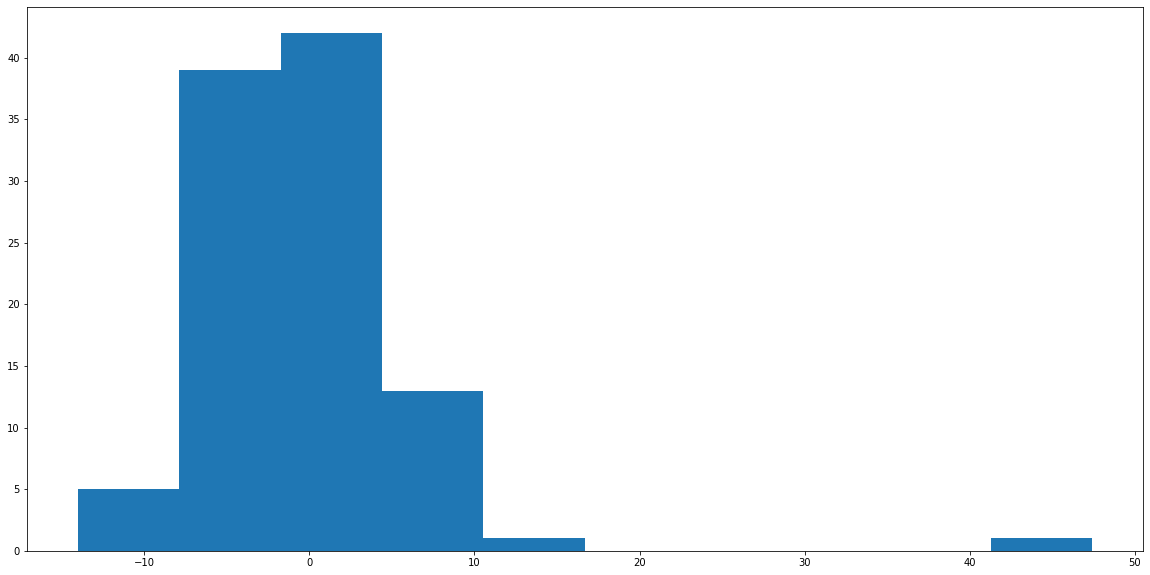

In [238]:
# Calculate the residuals
data5['Residuals'] = data5['y_estimates'] - data5['y']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(data5.Residuals)

# And we will print the statistical summary of the residuals,
# i.e. (median, mean, quartiles, etc.)
data5['Residuals'].describe()

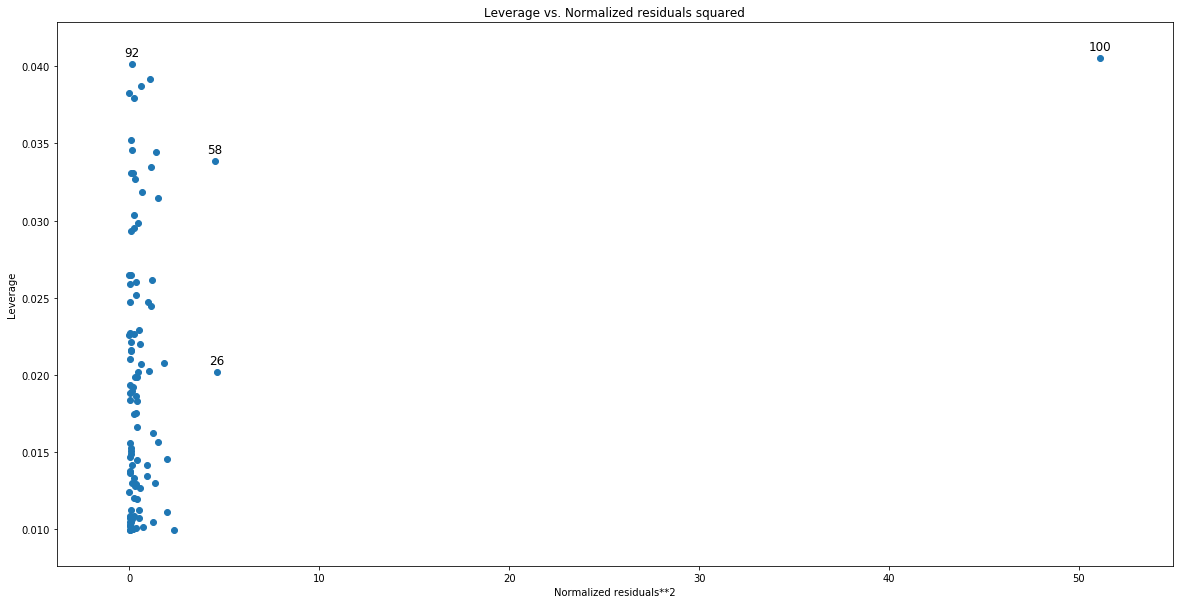

In [279]:
fig = plot_leverage_resid2(model5, ax=ax)

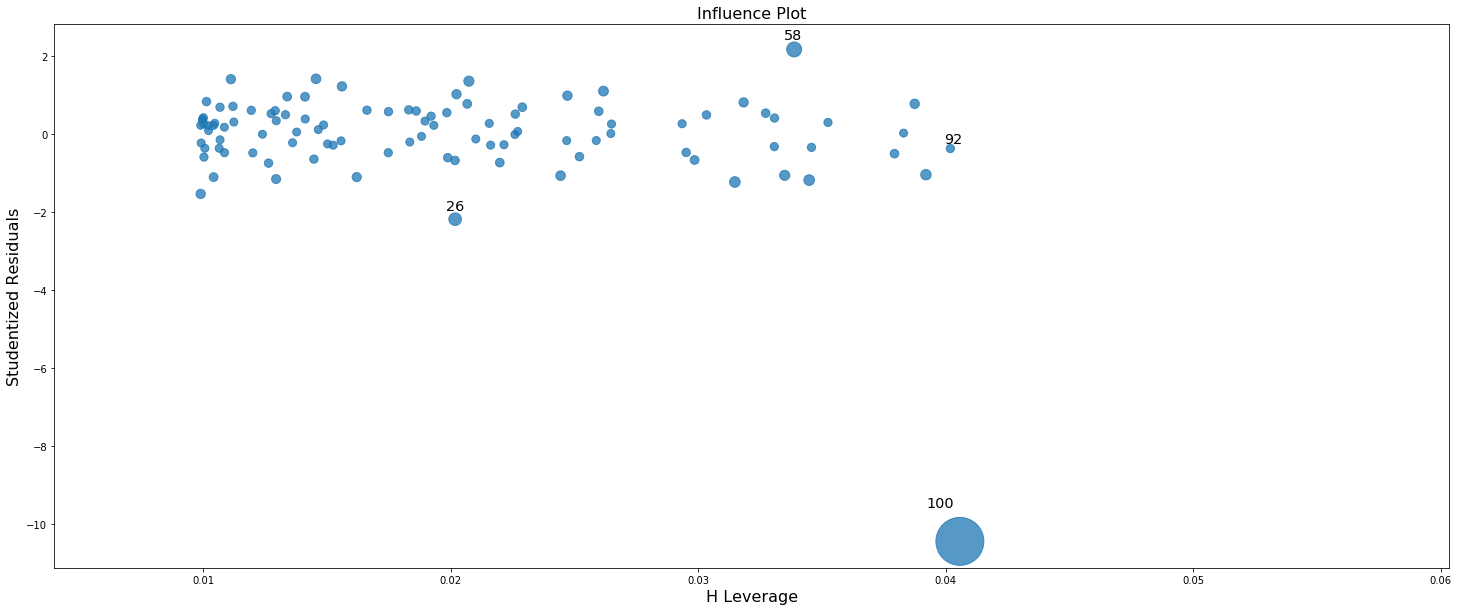

In [280]:
fig, ax = plt.subplots(figsize=(25,10))
fig = influence_plot(model5, ax=ax)

In [241]:
# calculate the R-squared

# Let's calculate the correlation between the 
# estimate and true values
cm = data5[['y', 'y_estimates']].corr()

# Square the obtained values
R2 = cm.loc['y', 'y_estimates']**2

# Print the R-squared
print ('R2 = %f' % R2)

R2 = 0.806209


In [242]:
print(data5['y'].quantile(0.10))
print(data5['y'].quantile(0.90))

6.348974044491036
43.30271801551334


In [243]:
data5["y"] = np.where(data5["y"] <6.348974044491036, 6.348974044491036,data5['y'])
data5["y"] = np.where(data5["y"] >43.30271801551334, 43.30271801551334,data5['y'])
print(data5['y'].skew())

0.015194077381729737


In [246]:
Q1 = data5.quantile(0.25)
Q3 = data5.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

y              26.542620
x               5.146000
y_estimates    24.531398
Residuals       5.992662
dtype: float64


In [247]:
df_out = data5[~((data5 < (Q1 - 1.5 * IQR)) |(data5 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(98, 4)


In [250]:
model51 = sm.ols('y ~ x', data = data5).fit()


In [251]:
model51.params

Intercept    3.821897
x            4.236075
dtype: float64

In [252]:
model51.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     444.5
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           2.18e-38
Time:                        20:32:07   Log-Likelihood:                -318.64
No. Observations:                 101   AIC:                             641.3
Df Residuals:                      99   BIC:                             646.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8219      1.151      3.321      0.001       1.538       6.106
x              4.2361      0.201     21.083      0.000       3.837       4.635
==============================================================================
Omnibus:                      106.077   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2138.764
Skew:                          -3.257   Prob(JB):                         0.00
Kurtosis:                      24.582   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Set 6 data**

In [253]:
data6 = pd.read_excel('/Users/arushigupta/Desktop/Assignment4_data.xlsx',  'Set 6')

In [254]:
data6.describe()

,y,x
count,101.000000,101.000000
mean,39.178208,5.618743
std,31.390864,4.268607
min,-6.757358,0.111800
25%,19.890518,2.539300
50%,39.493906,5.446000
75%,56.813645,8.108500
max,252.837897,35.783400


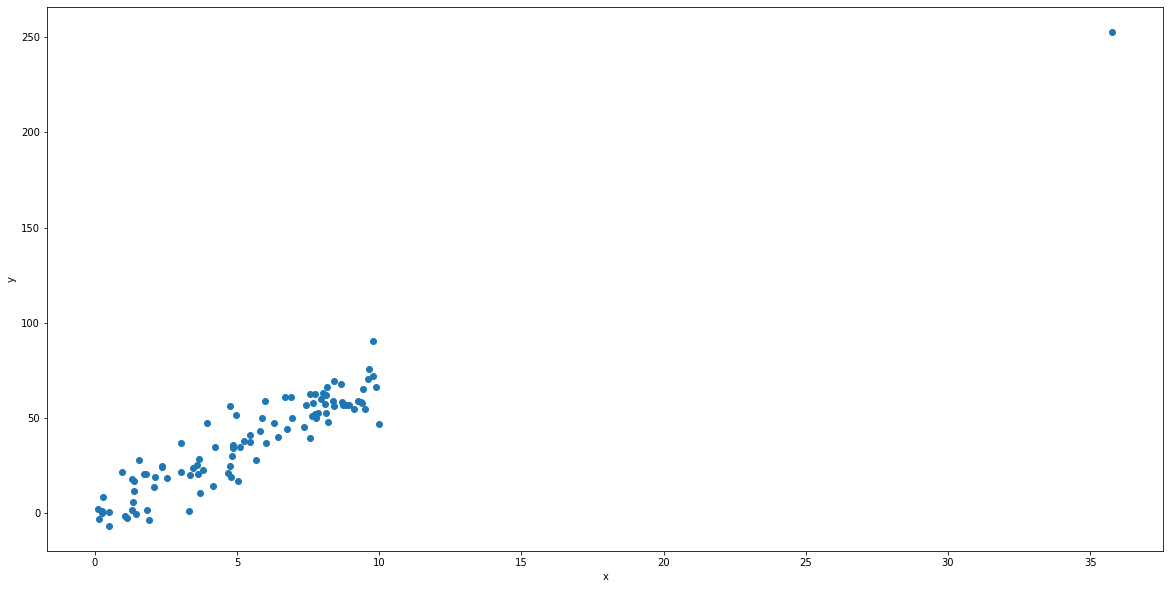

In [257]:
# And finally we will plot the data

plt.plot(data6.x, data6.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [258]:
# Let's calculate the Pearson's correlation coefficient first

# This will calculate the correlation matrix
cm = data6.corr(method = 'pearson')

# Print correlation matrix
cm

,y,x
y,1.000000,0.955578
x,0.955578,1.000000


In [259]:
# Calculate the means of x, y

mean_y = np.mean(data6.y)
mean_x = np.mean(data6.x)

print(mean_y, mean_x)

39.17820780213763 5.618742574257427


In [260]:
# Calculate the standard deviations of x, y

sig_x1 = np.std(data6.x, ddof=1)
sig_y1 = np.std(data6.y, ddof=1 )

print(sig_x1, sig_y1)

4.268606722534803 31.39086404094349


In [261]:
beta_1 = sig_y1/sig_x1 * cm.loc['x', 'y']
beta_0 = mean_y - beta_1 * mean_x

print(beta_0, beta_1)

-0.3059107436463222 7.027216147378343


In [262]:
# Initialize the regression model

model6 = sm.ols('y ~ x', data = data6).fit()

In [264]:
model6.params

Intercept   -0.305911
x            7.027216
dtype: float64

In [265]:
# Calculate estimates of y

intercept, slope = model6.params
data6['y_estimates'] = intercept + slope * data6.x

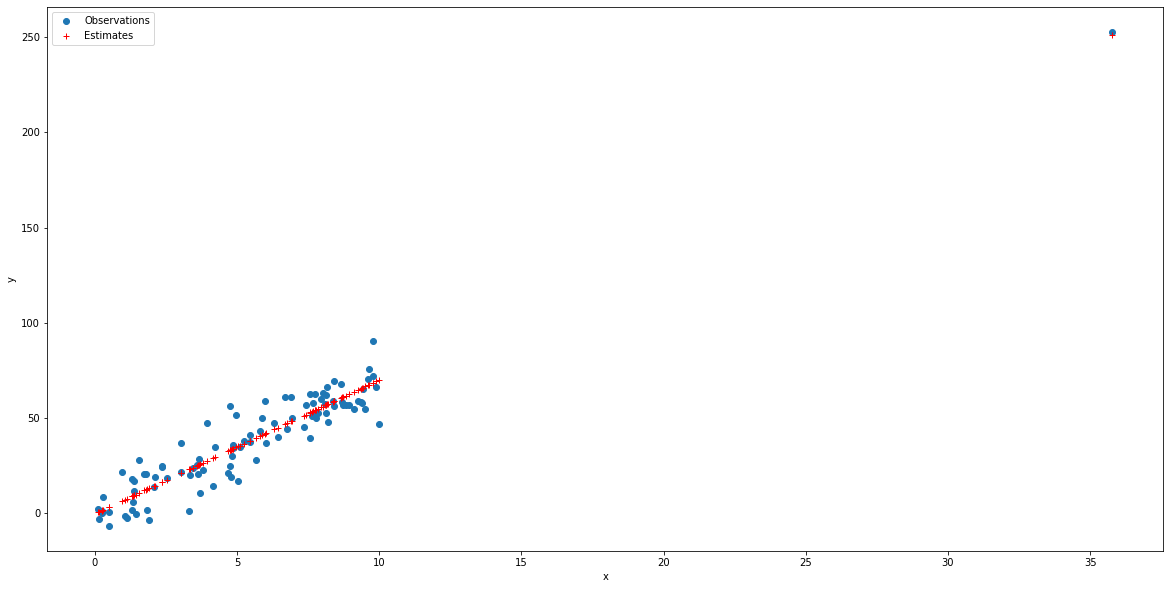

In [266]:
# Let's plot the estimates along the actual observations

plt.plot(data6.x, data6.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data6.x, data6.y_estimates, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

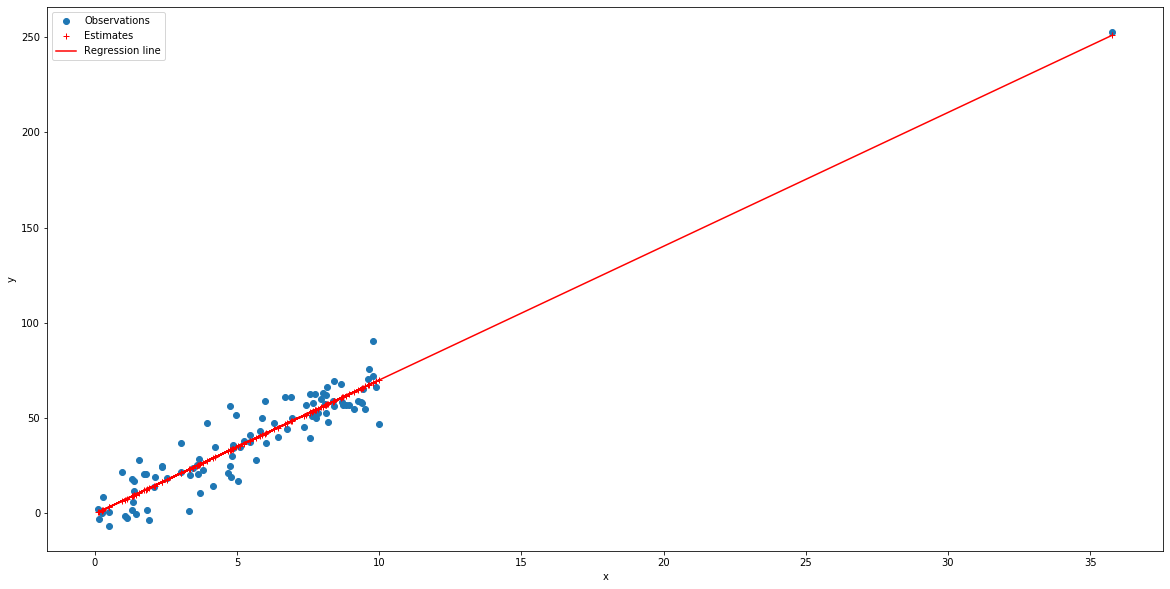

In [267]:
# all the estimates lie on the line;
# this is the regression line

plt.plot(data6.x, data6.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data6.x, data6.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data6.x, data6.y_estimates, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()

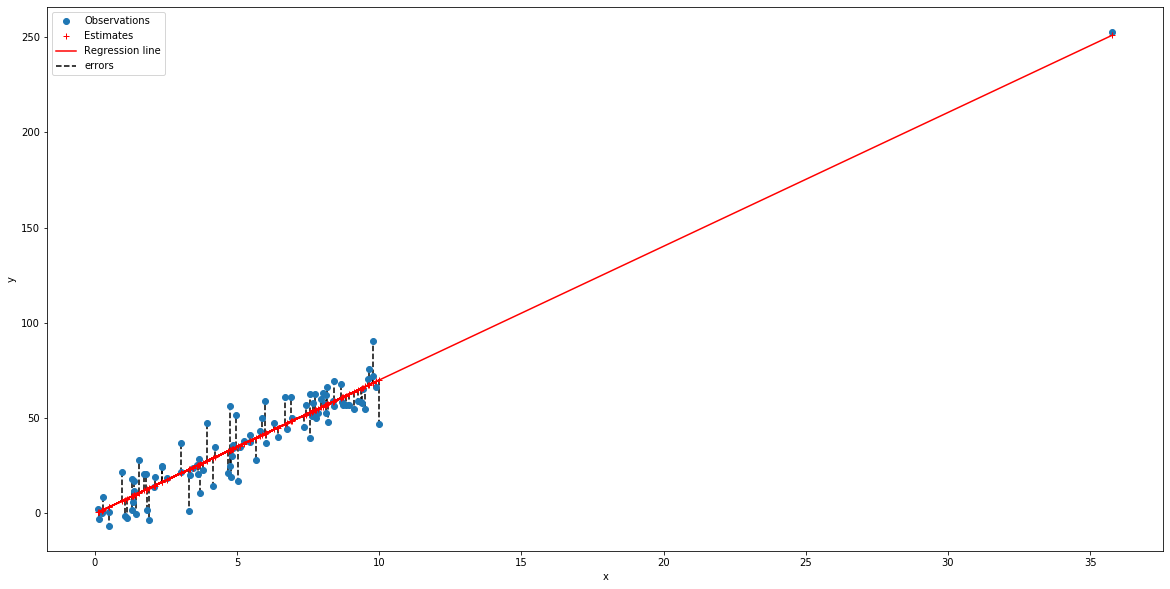

In [268]:
# We can even depict the errors associated with individual observations

plt.plot(data6.x, data6.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Draw estimates
plt.plot(data6.x, data6.y_estimates, 'r+', label='Estimates')

# Plot regression line
plt.plot(data6.x, data6.y_estimates, 'r-', label='Regression line')

# Plot errors
plt.vlines(data6.x, data6.y_estimates, data6.y, linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

In [269]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           2.49e-54
Time:                        11:34:43   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""